<a href="https://colab.research.google.com/github/Ankur099IIT/Aurelion-Geron--Hands-on-ML-with-sklearn-keras-and-tf-book--codes-and-excercises/blob/main/Image_Classification_flower_photos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.
['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
0.0 1.0
Epoch 1/10
92/92 [==============================] - 5s 54ms/step - loss: 1.3525 - accuracy: 0.4251 - val_loss: 1.0599 - val_accuracy: 0.5708
Epoch 2/10
92/92 [==============================] - 3s 33ms/step - loss: 1.0271 - accuracy: 0.5828 - val_loss: 1.0349 - val_accuracy: 0.5872
Epoch 3/10
92/92 [==============================] - 2s 24ms/step - loss: 0.8941 - accuracy: 0.6580 - val_loss: 0.9320 - val_accuracy: 0.6403
Epoch 4/10
92/92 [==============================] - 2s 24ms/step - loss: 0.7224 - accuracy: 0.7262 - val_loss: 0.9007 - val_accuracy: 0.6580
Epoch 5/10
92/92 [==============================] - 2s 24ms/step - loss: 0.5100 - accuracy: 0.8028 - val_loss: 0.9352 - val_accuracy: 0.6621
Epoch 6/10
92/92 [==============================] - 2s 23ms/step - loss: 0.3045 - accu

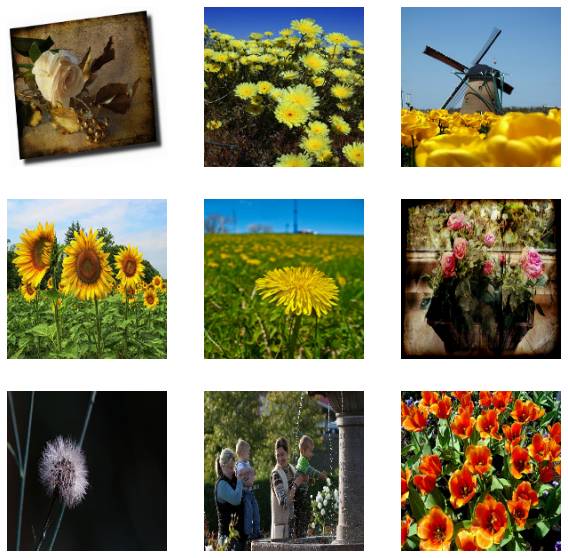

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import PIL
import pathlib

dataset_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data_dir = tf.keras.utils.get_file('flower_photos', origin = dataset_url, untar = True)

data_dir = pathlib.Path(data_dir)
image_count = len(list(data_dir.glob('*/*.jpg')))

roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                       validation_split = 0.2,
                                                       subset = 'training',
                                                       seed = 123,
                                                       image_size = (img_height, img_width),
                                                       batch_size = batch_size)
val_ds = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                       validation_split = 0.2,
                                                       subset = 'validation',
                                                       seed = 123,
                                                       image_size = (img_height, img_width),
                                                       batch_size = batch_size)

class_names = train_ds.class_names
print(class_names)

plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.axis('off')

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

normalization_layer = tf.keras.layers.Rescaling(1./255)



normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

print(np.min(first_image), np.max(first_image))

num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)